In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import anatools.data as data
import anatools.analysis as ana
ana.start()

Generate a list of datasets for each sample
----

In [2]:
basedir = "/home/gcorreia/cernbox/HEP_Project/CMS_HHDM/OUTPUT/Test"
list_basedir = os.listdir(basedir)
TreeName = 'selection'
period = '16'
yearTag = period + "_files"
samples = {
    'Signal_1000_300':          [i for i in list_basedir if 'Signal_1000_300' in i and 'APV' not in i and yearTag in i], 
    'Signal_400_100':           [i for i in list_basedir if 'Signal_400_100' in i and 'APV' not in i and yearTag in i],
    'Signal_600_200':           [i for i in list_basedir if 'Signal_600_200' in i and 'APV' not in i and yearTag in i], 
    'Signal_600_400':           [i for i in list_basedir if 'Signal_600_400' in i and 'APV' not in i and yearTag in i],
    'Signal_800_200':           [i for i in list_basedir if 'Signal_800_200' in i and 'APV' not in i and yearTag in i],
    'Signal_800_400':           [i for i in list_basedir if 'Signal_800_400' in i and 'APV' not in i and yearTag in i],
    #'DYJetsToLL_M-10to50':      [i for i in list_basedir if 'DYJetsToLL_M-10to50' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_M-50':          [i for i in list_basedir if 'DYJetsToLL_M-50' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_Pt-50To100':    [i for i in list_basedir if 'DYJetsToLL_Pt-50To100' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_Pt-100To250':   [i for i in list_basedir if 'DYJetsToLL_Pt-100To250' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_Pt-250To400':   [i for i in list_basedir if 'DYJetsToLL_Pt-250To400' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_Pt-400To650':   [i for i in list_basedir if 'DYJetsToLL_Pt-400To650' in i and 'APV' not in i and yearTag in i],
    'DYJetsToLL_Pt-650ToInf':   [i for i in list_basedir if 'DYJetsToLL_Pt-650ToInf' in i and 'APV' not in i and yearTag in i],
    'TTTo2L2Nu':                [i for i in list_basedir if 'TTTo2L2Nu' in i and 'APV' not in i and yearTag in i],
    'TTToSemiLeptonic':         [i for i in list_basedir if 'TTToSemiLeptonic' in i and 'APV' not in i and yearTag in i],
    'ST_tW_top':                [i for i in list_basedir if 'ST_tW_top' in i and 'APV' not in i and yearTag in i],
    'ST_tW_antitop':            [i for i in list_basedir if 'ST_tW_antitop' in i and 'APV' not in i and yearTag in i], 
    'ST_t-channel_top':         [i for i in list_basedir if 'ST_t-channel_top' in i and 'APV' not in i and yearTag in i],
    'ST_t-channel_antitop':     [i for i in list_basedir if 'ST_t-channel_antitop' in i and 'APV' not in i and yearTag in i],
    #'ST_s-channel':             [i for i in list_basedir if 'ST_s-channel' in i and 'APV' not in i and yearTag in i], 
    'ZZ':                       [i for i in list_basedir if 'ZZ' == i.split("_")[0] and 'APV' not in i and yearTag in i],
    'WZ':                       [i for i in list_basedir if 'WZ' == i.split("_")[0] and 'APV' not in i and yearTag in i], 
    'WW':                       [i for i in list_basedir if 'WW' == i.split("_")[0] and 'APV' not in i and yearTag in i],
    'WZZ':                      [i for i in list_basedir if 'WZZ' in i and 'APV' not in i and yearTag in i],
    'WWZ':                      [i for i in list_basedir if 'WWZ' in i and 'APV' not in i and yearTag in i],
    'ZZZ':                      [i for i in list_basedir if 'ZZZ' in i and 'APV' not in i and yearTag in i],
    'WWW':                      [i for i in list_basedir if 'WWW' in i and 'APV' not in i and yearTag in i],
    #'TTZToQQ':                  [i for i in list_basedir if 'TTZToQQ' in i and 'APV' not in i and yearTag in i],
    #'TTZToNuNu':                [i for i in list_basedir if 'TTZToNuNu' in i and 'APV' not in i and yearTag in i],
    #'TWZToLL_thad_Wlept':       [i for i in list_basedir if 'TWZToLL_thad_Wlept' in i and 'APV' not in i and yearTag in i], 
    #'TWZToLL_tlept_Whad':       [i for i in list_basedir if 'TWZToLL_tlept_Whad' in i and 'APV' not in i and yearTag in i],
    #'TWZToLL_tlept_Wlept':      [i for i in list_basedir if 'TWZToLL_tlept_Wlept' in i and 'APV' not in i and yearTag in i],
    #'WGToLNuG':                 [i for i in list_basedir if 'WGToLNuG' in i and 'APV' not in i and yearTag in i],
    'ZGToLLG':                  [i for i in list_basedir if 'ZGToLLG' in i and 'APV' not in i and yearTag in i],
    #'WJetsToLNu':               [i for i in list_basedir if 'WJetsToLNu' in i and 'APV' not in i and yearTag in i],
    'TTGJets':                  [i for i in list_basedir if 'TTGJets' in i and 'APV' not in i and yearTag in i],
    'TTGamma':                  [i for i in list_basedir if 'TTGamma' in i and 'APV' not in i and yearTag in i],
    #'TTWZ':                     [i for i in list_basedir if 'TTWZ' in i and 'APV' not in i and yearTag in i],
    #'TTZZ':                     [i for i in list_basedir if 'TTZZ' in i and 'APV' not in i and yearTag in i],
    'Data_F':                    [i for i in list_basedir if 'Data' in i and '_F_' in i and 'HIPM' not in i and yearTag in i],
    'Data_G':                    [i for i in list_basedir if 'Data' in i and '_G_' in i and yearTag in i],
    'Data_H':                    [i for i in list_basedir if 'Data' in i and '_H_' in i and yearTag in i],
}


Check jobs integrity
----

In [3]:
Integrity_Jobs, Error_OldJobs, Error_Output = data.check_integrity(basedir, period, samples)
Integrity_Jobs = pd.DataFrame(Integrity_Jobs)

display(Integrity_Jobs)
        
print("")
print("====================================================================================================")
print("List of jobs that are not part of the jobs submitted: (remove them!)")
print(*Error_OldJobs, sep=' ')
print("====================================================================================================")

print("")
print("====================================================================================================")
print("List of jobs with error in the output:")
print(*Error_Output, sep=' ')
print("====================================================================================================")
print("")


100%|██████████| 31/31 [00:49<00:00,  1.60s/it]


,Dataset,nFolders,Good,Bad,Entries
0,Signal_1000_300,1,1,0,68719
1,Signal_400_100,1,1,0,48499
2,Signal_600_200,1,1,0,60187
3,Signal_600_400,1,1,0,50801
4,Signal_800_200,1,1,0,66163
5,Signal_800_400,1,1,0,64322
6,DYJetsToLL_M-50,48,42,6,76
7,DYJetsToLL_Pt-50To100,66,66,0,59795
8,DYJetsToLL_Pt-100To250,53,53,0,425089
9,DYJetsToLL_Pt-250To400,19,19,0,353489



List of jobs that are not part of the jobs submitted: (remove them!)


List of jobs with error in the output:
DYJetsToLL_M-50_16_files_30_30 DYJetsToLL_M-50_16_files_39_39 DYJetsToLL_M-50_16_files_5_5 DYJetsToLL_M-50_16_files_21_21 DYJetsToLL_M-50_16_files_6_6 DYJetsToLL_M-50_16_files_10_10 ST_t-channel_top_16_files_33_33 ST_t-channel_top_16_files_32_32 ST_t-channel_top_16_files_4_4 ST_t-channel_top_16_files_25_25 ST_t-channel_antitop_16_files_17_17 ZZ_16_files_16_16 ZZ_16_files_9_9 ZZ_16_files_0_0 WZ_16_files_12_12 WZ_16_files_13_13 WZ_16_files_1_1 WZ_16_files_19_19 WZ_16_files_3_3 WZ_16_files_6_6 WZ_16_files_15_15 WZ_16_files_16_16 WZ_16_files_20_20 WW_16_files_11_11 WW_16_files_28_28 WW_16_files_12_12 WW_16_files_10_10 WW_16_files_22_22 WW_16_files_6_6 WW_16_files_23_23 WW_16_files_27_27 WW_16_files_30_30 WW_16_files_7_7 WW_16_files_5_5 WW_16_files_14_14 WW_16_files_24_24 WW_16_files_4_4 WW_16_files_13_13 WW_16_files_9_9 Data_SingleEle_G_16_files_6_6 Data_SingleEle_G_16_files_33_33

Generate cutflow and files
----

100%|██████████| 26/26 [00:36<00:00,  1.39s/it]


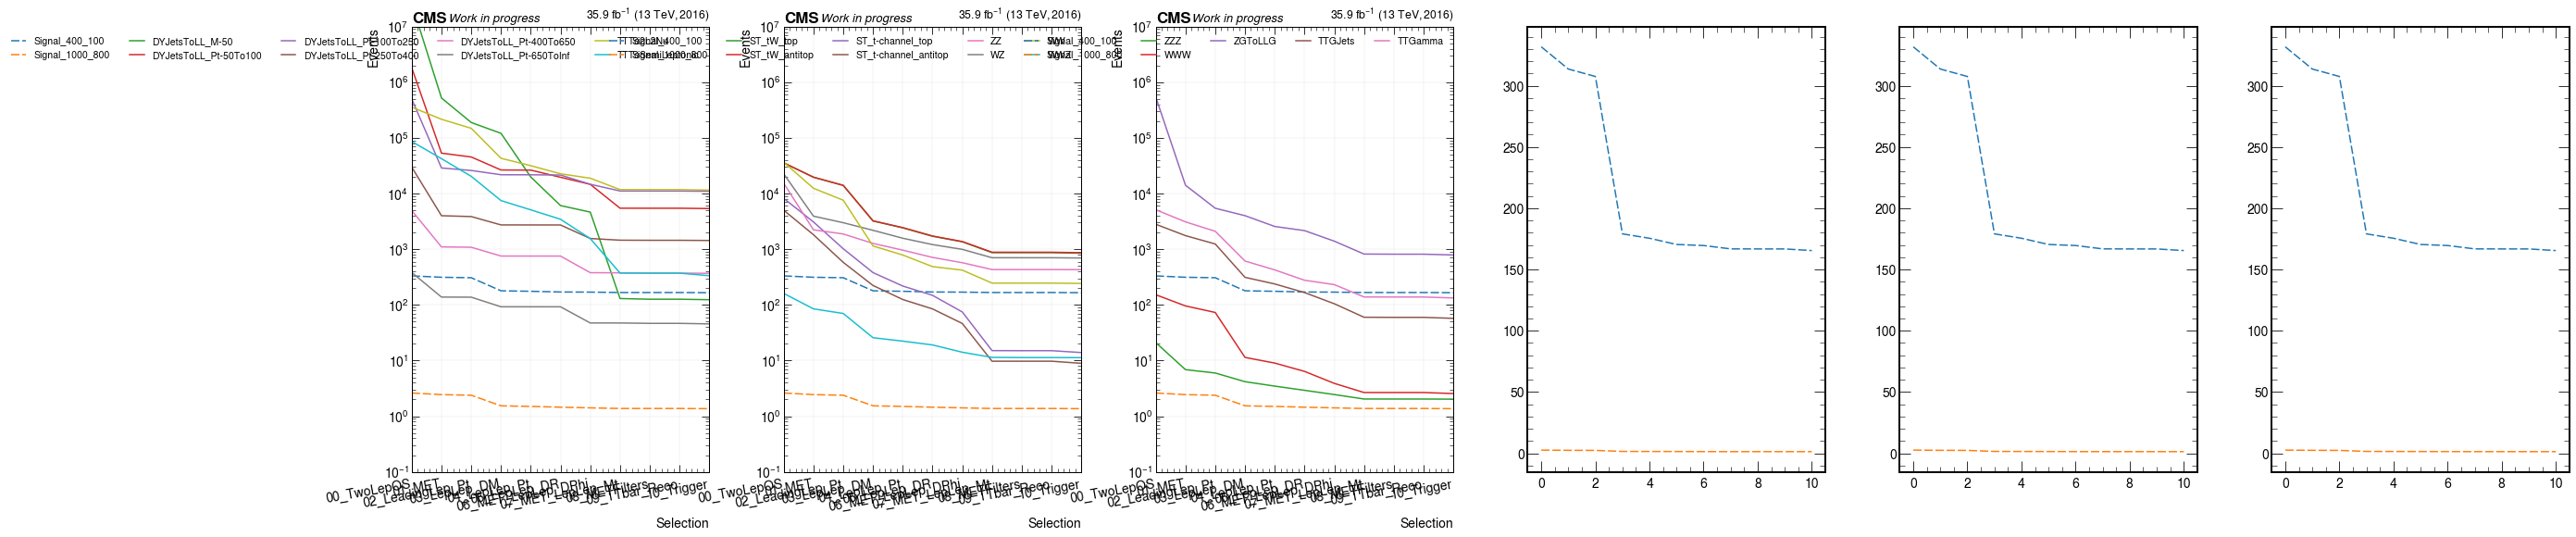

In [7]:
data.generate_cutflow(basedir, period, samples)
data.generate_files(basedir, period, samples, format="parquet")